In [1]:
import os
import sys

# Set working directory to project root
os.chdir(r'C:\Users\hp\Desktop\tutorial\kaim-week-1')

# Add current directory to Python path
sys.path.append('.')

# Now import should work
from scripts.utils import read_csv_file, count_headline_length



read the csv file and display the first 30 rows

In [2]:
data_path = "data/raw_analyst_ratings.csv"
data = read_csv_file(data_path)
data=data.get("data")
data.head(30)


,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [3]:
from scripts.utils import count_headline_length
result=count_headline_length(data)
print("mean length:", result.get("mean"))
print("median length:", result.get("median_length"))
print("standard deviation:", result.get("stdev_length"))
print("headline length counts:", data.shape[0]-1)


mean length: 73.12051490484095
median length: 64.0
standard deviation: 40.73529545937668
headline length counts: 1407327


Counting number of publishers per article

In [4]:
import pandas as pd
#print(data.dtypes)
data_1 = pd.DataFrame(data)
publisher_counts=data_1["publisher"].value_counts()
print(publisher_counts)



publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


Visualizing trends over time

In [5]:
#convert publication_date to datetime
data['date']=pd.to_datetime(data['date'],errors='coerce',format='%Y-%m-%d %H:%M:%S')
#create year,month,day columns
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['day']=data['date'].dt.day
#group by year,month,day and count the number of articles and analyze the trends
articles_by_year= data.groupby('year').size()
articles_by_month=data.groupby('month').size()
articles_by_day=data.groupby('day').size()




Plot the trends through daily, weekly, monthly and yearly analysis

['headline', 'url', 'publisher', 'date', 'stock', 'year', 'month', 'day']


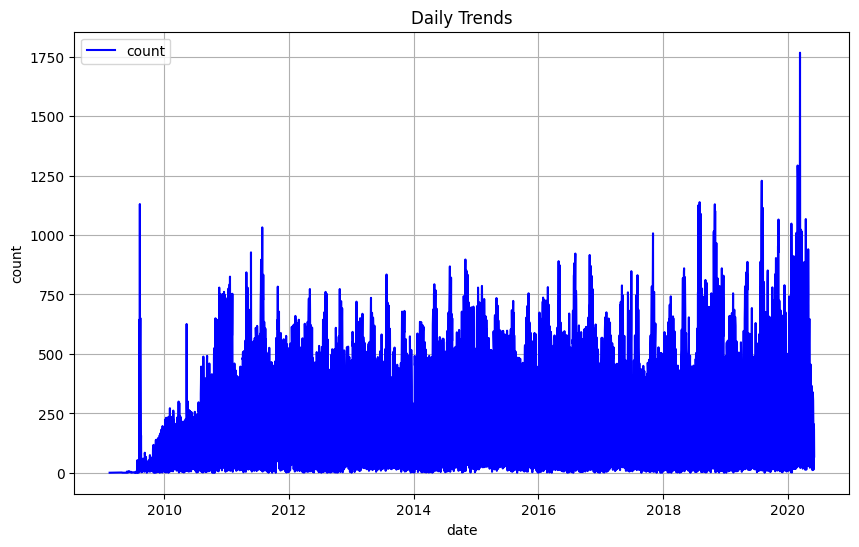

<Figure size 640x480 with 0 Axes>

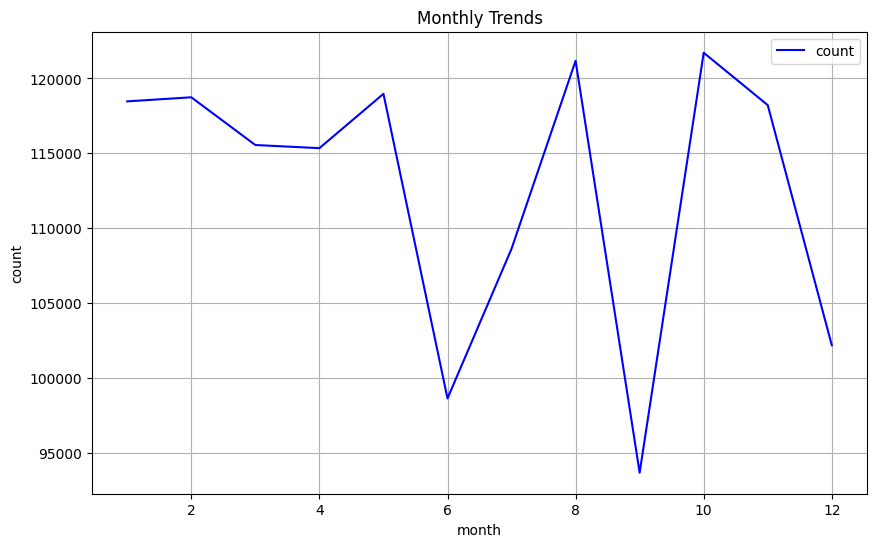

<Figure size 640x480 with 0 Axes>

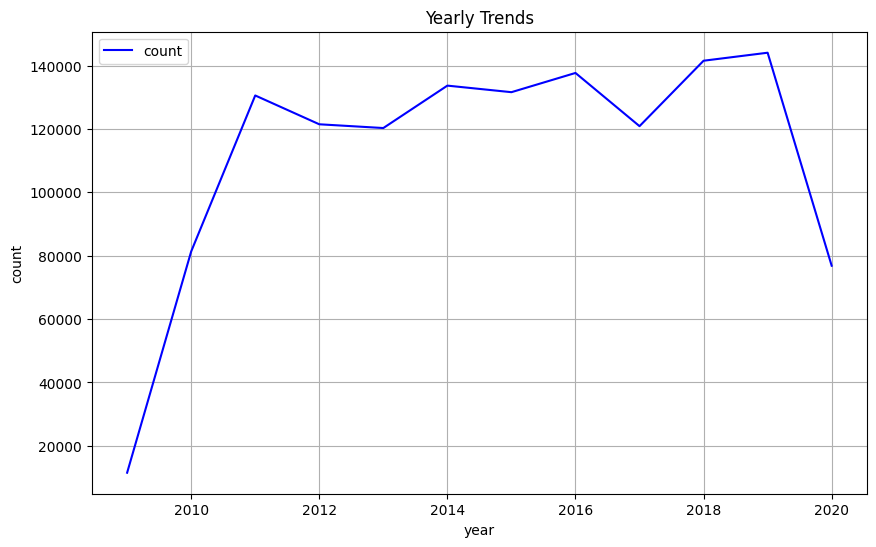

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
#group by date,month,year and calculate the mean of the stock_value
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
daily_data = data.groupby(data['date'].dt.date)[numeric_columns].mean().reset_index()
monthly_data = data.groupby(data['date'].dt.month)[numeric_columns].mean().reset_index()
yearly_data = data.groupby(data['date'].dt.year)[numeric_columns].mean().reset_index()
print(list(data.columns))
#plot the trends
from scripts.plot import plot_stock_data
#for daily analysis
daily_counts = data.groupby('date').size().reset_index(name='count')
plot_stock_data(daily_counts,date_column='date',stock_value_column='count',title='Daily Trends')
# For monthly analysis
monthly_counts = data.groupby('month').size().reset_index(name='count')
plot_stock_data(monthly_counts,date_column='month',stock_value_column='count',title='Monthly Trends')
# For yearly analysis
yearly_counts = data.groupby('year').size().reset_index(name='count')
plot_stock_data(yearly_counts,date_column='year',stock_value_column='count',title='Yearly Trends')

Perform a sentinel analysis. We will use advanced NLP libraries like textBlob, vader or transformers.

In [7]:
from scripts.utils import analyze_sentiment
from scripts.utils import get_sentiment_category
#apply sentiment analysis to the headline column
#add a new column to the dataframe called sentiment and polarity
sample_headline=data.sample(n=100000)
sample_headline['polarity'] = sample_headline['headline'].apply(analyze_sentiment).apply(pd.Series)
#print(data.shape)

In [12]:
#add a new column to the dataframe called sentiment_category
sample_headline['sentiment_category'] = sample_headline['polarity'].apply(get_sentiment_category)

Print the summary of the sentiment category we created

In [15]:
#print summary
print("Summary of the sentiment category:\n")
#print(sample_headline['sentiment_category'].head())
print(sample_headline['sentiment_category'].value_counts())



Summary of the sentiment category:

sentiment_category
neutral     66218
positive    24174
negative     9608
Name: count, dtype: int64


Find common keywords

In [16]:
from scripts.utils import common_phrases
sample_headline['common_phrases'] = sample_headline['headline'].apply(common_phrases)
print(sample_headline['common_phrases'].head())



ImportError: cannot import name 'common_phrases' from 'scripts.utils' (C:\Users\hp\Desktop\tutorial\kaim-week-1\scripts\utils.py)